# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
filenya = files.upload()

Saving Data Fix 2 Class.csv to Data Fix 2 Class.csv


In [3]:
data=pd.read_csv('Data Fix 2 Class.csv')

# Pre-Processing

In [4]:
data

,TPT,TPAK,IPM,JPM,JAK
0,above,65.34,69.98,185.20,849621
1,under,67.34,71.96,211.60,876517
2,under,68.14,68.99,140.10,481578
3,under,70.09,67.34,136.10,493718
4,under,68.72,69.60,201.30,621725
...,...,...,...,...,...
114,under,76.70,74.44,74.62,4614
115,under,73.18,80.01,131.15,17700
116,under,76.31,69.96,123.08,8591
117,under,70.52,83.85,90.17,26571


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPT     119 non-null    object 
 1   TPAK    119 non-null    float64
 2   IPM     119 non-null    float64
 3   JPM     119 non-null    float64
 4   JAK     119 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 4.8+ KB


In [6]:
data.describe()

,TPAK,IPM,JPM,JAK
count,119.000000,119.000000,119.000000,1.190000e+02
mean,67.780153,72.608151,104.554495,5.694449e+05
std,3.688416,5.382120,62.920500,3.458538e+05
min,58.610000,61.940000,3.000000,4.614000e+03
25%,65.245000,68.670000,63.800000,3.748760e+05
50%,67.670000,71.750000,98.370000,5.484500e+05
75%,70.140000,75.585000,140.595000,7.243205e+05
max,76.700000,86.650000,293.200000,1.507401e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc669875410>,
      dtype=object)

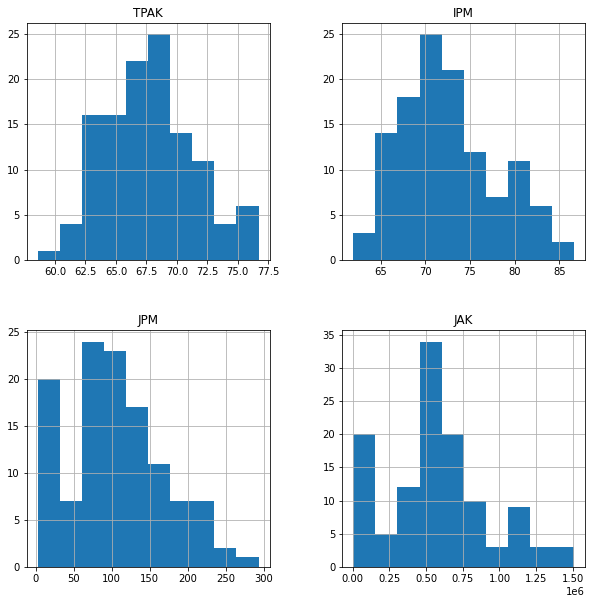

In [7]:
data.select_dtypes(include=['int64', 'float64']).hist(figsize=(10,10))

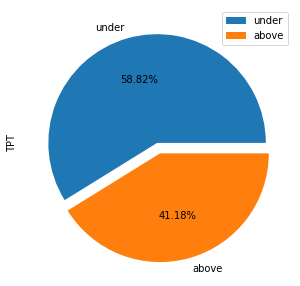

In [8]:
plt.figure(figsize=(5,5))
data['TPT'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%')
plt.legend()
plt.show()

# Encoding Variables

In [9]:
from sklearn.preprocessing import LabelEncoder
bin_cols = ['TPT']
le = LabelEncoder()
for i in bin_cols :
  data[i] = le.fit_transform(data[i])
  

Transformasi

In [10]:
from sklearn.preprocessing import MinMaxScaler
num_cols = ['TPAK','IPM','JPM','JAK','TPT']
scaler = MinMaxScaler(feature_range=(0,1))
data[num_cols] = scaler.fit_transform(data[num_cols])
data_columns = ['X1', 'X2', 'X3', 'X4', 'Y']
data.head()

,TPT,TPAK,IPM,JPM,JAK
0,0.0,0.372029,0.325374,0.627843,0.562293
1,1.0,0.482587,0.405504,0.718815,0.580191
2,1.0,0.526810,0.285310,0.472433,0.317386
3,1.0,0.634605,0.218535,0.458649,0.325465
4,1.0,0.558872,0.309996,0.683322,0.410644


In [11]:
data.describe()

,TPT,TPAK,IPM,JPM,JAK
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.588235,0.506918,0.431734,0.349947,0.375856
std,0.494234,0.203893,0.217811,0.216818,0.230142
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.366777,0.272359,0.209511,0.246384
50%,1.000000,0.500829,0.397005,0.328635,0.361885
75%,1.000000,0.637369,0.552206,0.474139,0.478915
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Partition

In [12]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, test_size = 0.2, random_state = 42)

X_train = train.drop(labels='TPT', axis=1)
Y_train = train['TPT']
X_test = test.drop(labels='TPT', axis=1)
Y_test = test['TPT']

In [13]:
print(X_train)

         TPAK       IPM       JPM       JAK
44   0.509674  0.225820  0.406961  0.038768
12   0.640133  0.564549  0.280841  0.320402
15   0.548922  0.271550  0.327016  0.307119
70   0.464345  0.192230  0.770400  0.855914
108  0.446656  0.404290  0.658063  0.361885
..        ...       ...       ...       ...
106  0.155887  0.120194  0.382805  0.339027
14   0.588170  0.320518  0.547553  0.484900
92   0.743505  0.672602  0.024466  0.050615
51   0.185738  0.256172  0.537560  0.507289
102  0.346600  0.839741  0.303239  0.940397

[95 rows x 4 columns]


In [14]:
print(X_test)

         TPAK       IPM       JPM       JAK
56   0.226645  0.525293  0.082012  0.098305
89   0.526258  0.161878  0.411544  0.306690
4    0.558872  0.309996  0.683322  0.410644
45   0.292427  0.385269  0.348725  0.376009
26   0.423438  0.177256  0.681254  0.423940
117  0.658375  0.886686  0.300379  0.014611
69   0.404091  0.137191  0.330393  0.361885
10   0.546711  0.602995  0.208822  0.317481
90   0.908237  0.173209  0.720124  0.439682
73   0.751244  0.208418  0.253067  0.263865
18   0.742952  0.526103  0.189524  0.322137
112  0.276396  0.411170  0.114438  0.201400
11   0.621891  0.325374  0.328394  0.357701
96   0.346600  0.648321  0.012509  0.040941
42   0.143173  0.290571  0.414197  0.331010
31   0.461581  0.857143  0.021365  0.065814
88   0.431730  0.000000  0.686458  0.318867
0    0.372029  0.325374  0.627843  0.562293
97   0.448867  0.766491  0.016161  0.060486
110  0.391929  0.667341  0.328635  0.734264
64   0.808734  0.304330  0.253067  0.272697
40   0.433941  0.149737  0.54066

# Data Modelling

In [15]:
import numpy as np
from tensorflow import random

np.random.seed(42)
random.set_seed(42)

In [16]:
X_train.shape

(95, 4)

# Optimizer =sgd

In [66]:
from keras.models import Sequential
from keras.layers import Dense

jum_hidden_layer1 = 300
jum_hidden_layer2 = 20
jum_input_unit = X_train.shape[1]
jum_ouput_layer = 1
model = Sequential()
model.add(Dense(jum_hidden_layer1, input_dim=jum_input_unit, activation='relu'))
model.add(Dense(jum_hidden_layer2, activation='relu'))
model.add(Dense(jum_ouput_layer,activation = 'sigmoid'))

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 300)               1500      
                                                                 
 dense_16 (Dense)            (None, 20)                6020      
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 7,541
Trainable params: 7,541
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

In [69]:
##Fungsi Callback untuk Stop Training menghindari Overfitting and mengharapkan hasil akurasi
import tensorflow as tf

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90):  # berhenti training ketika accuracy diatas 90%
      self.model.stop_training = True

stopTraining = Callback()

In [70]:
history = model.fit(X_train, 
                    Y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    shuffle=True,
                    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=2,
                    callbacks=[stopTraining])

Epoch 1/300
3/3 - 1s - loss: 0.6972 - accuracy: 0.3421 - val_loss: 0.6997 - val_accuracy: 0.3158 - 604ms/epoch - 201ms/step
Epoch 2/300
3/3 - 0s - loss: 0.6952 - accuracy: 0.4474 - val_loss: 0.6994 - val_accuracy: 0.3684 - 33ms/epoch - 11ms/step
Epoch 3/300
3/3 - 0s - loss: 0.6932 - accuracy: 0.5789 - val_loss: 0.6988 - val_accuracy: 0.3684 - 43ms/epoch - 14ms/step
Epoch 4/300
3/3 - 0s - loss: 0.6912 - accuracy: 0.6316 - val_loss: 0.6986 - val_accuracy: 0.3684 - 49ms/epoch - 16ms/step
Epoch 5/300
3/3 - 0s - loss: 0.6896 - accuracy: 0.5789 - val_loss: 0.6983 - val_accuracy: 0.3684 - 49ms/epoch - 16ms/step
Epoch 6/300
3/3 - 0s - loss: 0.6881 - accuracy: 0.5921 - val_loss: 0.6980 - val_accuracy: 0.4211 - 38ms/epoch - 13ms/step
Epoch 7/300
3/3 - 0s - loss: 0.6866 - accuracy: 0.6184 - val_loss: 0.6979 - val_accuracy: 0.4737 - 49ms/epoch - 16ms/step
Epoch 8/300
3/3 - 0s - loss: 0.6852 - accuracy: 0.6053 - val_loss: 0.6978 - val_accuracy: 0.4737 - 33ms/epoch - 11ms/step
Epoch 9/300
3/3 - 0s -

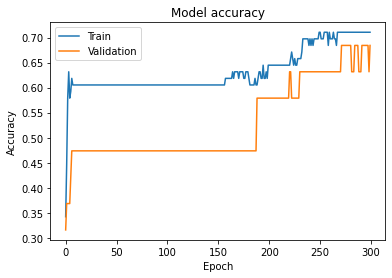

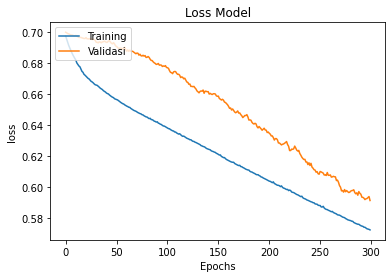

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
print('\n')
# Menampilkan nilai loss training dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validasi'], loc='upper left')
plt.show()

In [72]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Eror dari pengujian adalah {test_loss:.4f} dan akurasinya adalah {100*test_acc:.2f}')

1/1 [==============================] - 0s 19ms/step - loss: 0.5428 - accuracy: 0.7083
Eror dari pengujian adalah 0.5428 dan akurasinya adalah 70.83


## Prediksi

In [73]:
pred_sgd=model.predict(X_test)
rounded_sgd = [round(x[0]) for x in pred_sgd]
data_predict_sgd= pd.DataFrame(rounded_sgd, columns=['predict'])
Y_test =  Y_test.reset_index()
Y_test_sgd = Y_test[['TPT']]
result_sgd=pd.concat([Y_test_sgd,data_predict_sgd],axis=1)
result_sgd

,TPT,predict
0,0.0,1
1,1.0,1
2,1.0,1
3,0.0,1
4,0.0,1
5,1.0,1
6,1.0,1
7,1.0,1
8,1.0,1
9,1.0,1


In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_test = result_sgd['TPT']
Y_preds = result_sgd['predict']

print('accuracy score: ',accuracy_score(Y_test, Y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(Y_test,Y_preds))
print('\n')
print(classification_report(Y_test, Y_preds))

accuracy score:  0.7083333333333334


confusion matrix: 
 [[ 2  7]
 [ 0 15]]


              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36         9
         1.0       0.68      1.00      0.81        15

    accuracy                           0.71        24
   macro avg       0.84      0.61      0.59        24
weighted avg       0.80      0.71      0.64        24



# Optimizer =adam

In [75]:
from keras.models import Sequential
from keras.layers import Dense

jum_hidden_layer1 = 300
jum_hidden_layer2 = 20
jum_input_unit = X_train.shape[1]
jum_ouput_layer = 1
model = Sequential()
model.add(Dense(jum_hidden_layer1, input_dim=jum_input_unit, activation='relu'))
model.add(Dense(jum_hidden_layer2, activation='relu'))
model.add(Dense(jum_ouput_layer,activation = 'sigmoid'))

In [76]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 300)               1500      
                                                                 
 dense_19 (Dense)            (None, 20)                6020      
                                                                 
 dense_20 (Dense)            (None, 1)                 21        
                                                                 
Total params: 7,541
Trainable params: 7,541
Non-trainable params: 0
_________________________________________________________________


In [77]:
##Fungsi Callback untuk Stop Training menghindari Overfitting and mengharapkan hasil akurasi
import tensorflow as tf

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90):  # berhenti training ketika accuracy diatas 90%
      self.model.stop_training = True

stopTraining = Callback()

In [78]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(X_train, 
                    Y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    shuffle=True,
                    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=2,
                    callbacks=[stopTraining])

Epoch 1/300
3/3 - 1s - loss: 0.6897 - accuracy: 0.5789 - val_loss: 0.6917 - val_accuracy: 0.4737 - 663ms/epoch - 221ms/step
Epoch 2/300
3/3 - 0s - loss: 0.6763 - accuracy: 0.6184 - val_loss: 0.6887 - val_accuracy: 0.4737 - 44ms/epoch - 15ms/step
Epoch 3/300
3/3 - 0s - loss: 0.6655 - accuracy: 0.6053 - val_loss: 0.6853 - val_accuracy: 0.4737 - 34ms/epoch - 11ms/step
Epoch 4/300
3/3 - 0s - loss: 0.6580 - accuracy: 0.6053 - val_loss: 0.6811 - val_accuracy: 0.4737 - 48ms/epoch - 16ms/step
Epoch 5/300
3/3 - 0s - loss: 0.6503 - accuracy: 0.6053 - val_loss: 0.6766 - val_accuracy: 0.4737 - 38ms/epoch - 13ms/step
Epoch 6/300
3/3 - 0s - loss: 0.6444 - accuracy: 0.6053 - val_loss: 0.6704 - val_accuracy: 0.4737 - 50ms/epoch - 17ms/step
Epoch 7/300
3/3 - 0s - loss: 0.6383 - accuracy: 0.6053 - val_loss: 0.6644 - val_accuracy: 0.4737 - 34ms/epoch - 11ms/step
Epoch 8/300
3/3 - 0s - loss: 0.6316 - accuracy: 0.6053 - val_loss: 0.6577 - val_accuracy: 0.4737 - 36ms/epoch - 12ms/step
Epoch 9/300
3/3 - 0s -

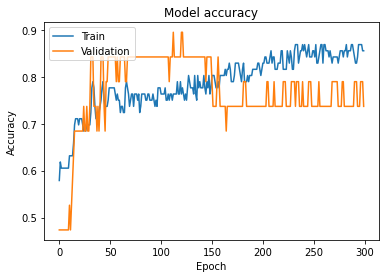

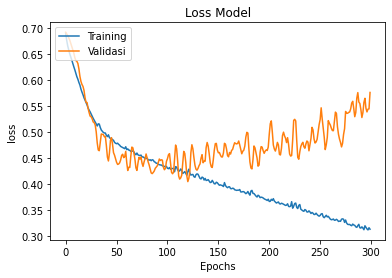

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
print('\n')
# Menampilkan nilai loss training dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validasi'], loc='upper left')
plt.show()

In [81]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Eror dari pengujian adalah {test_loss:.4f} dan akurasinya adalah {100*test_acc:.2f}')

1/1 [==============================] - 0s 28ms/step - loss: 0.3117 - accuracy: 0.9167
Eror dari pengujian adalah 0.3117 dan akurasinya adalah 91.67


## Prediksi

In [82]:
pred_adam=model.predict(X_test)
rounded_adam = [round(x[0]) for x in pred_adam]
data_predict_adam= pd.DataFrame(rounded_adam, columns=['predict'])
Y_test =  Y_test.reset_index()
Y_test_adam = Y_test[['TPT']]
result_adam=pd.concat([Y_test_adam,data_predict_adam],axis=1)
result_adam

,TPT,predict
0,0.0,0
1,1.0,1
2,1.0,1
3,0.0,0
4,0.0,0
5,1.0,1
6,1.0,0
7,1.0,1
8,1.0,1
9,1.0,1


In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_test = result_adam['TPT']
Y_preds = result_adam['predict']

print('accuracy score: ',accuracy_score(Y_test, Y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(Y_test,Y_preds))
print('\n')
print(classification_report(Y_test, Y_preds))

accuracy score:  0.9166666666666666


confusion matrix: 
 [[ 9  0]
 [ 2 13]]


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90         9
         1.0       1.00      0.87      0.93        15

    accuracy                           0.92        24
   macro avg       0.91      0.93      0.91        24
weighted avg       0.93      0.92      0.92        24



# Optimizer = Rmsprop

In [88]:
from keras.models import Sequential
from keras.layers import Dense

jum_hidden_layer1 = 300
jum_hidden_layer2 = 20
jum_input_unit = X_train.shape[1]
jum_ouput_layer = 1
model = Sequential()
model.add(Dense(jum_hidden_layer1, input_dim=jum_input_unit, activation='relu'))
model.add(Dense(jum_hidden_layer2, activation='relu'))
model.add(Dense(jum_ouput_layer,activation = 'sigmoid'))

In [89]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 300)               1500      
                                                                 
 dense_22 (Dense)            (None, 20)                6020      
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 7,541
Trainable params: 7,541
Non-trainable params: 0
_________________________________________________________________


In [90]:
##Fungsi Callback untuk Stop Training menghindari Overfitting and mengharapkan hasil akurasi
import tensorflow as tf

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90):  # berhenti training ketika accuracy diatas 90%
      self.model.stop_training = True

stopTraining = Callback()

In [91]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [92]:
history = model.fit(X_train, 
                    Y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    shuffle=True,
                    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=2,
                    callbacks=[stopTraining])

Epoch 1/300
3/3 - 1s - loss: 0.6899 - accuracy: 0.5526 - val_loss: 0.6754 - val_accuracy: 0.5789 - 781ms/epoch - 260ms/step
Epoch 2/300
3/3 - 0s - loss: 0.6684 - accuracy: 0.6579 - val_loss: 0.6659 - val_accuracy: 0.6842 - 43ms/epoch - 14ms/step
Epoch 3/300
3/3 - 0s - loss: 0.6582 - accuracy: 0.6711 - val_loss: 0.6622 - val_accuracy: 0.6316 - 34ms/epoch - 11ms/step
Epoch 4/300
3/3 - 0s - loss: 0.6483 - accuracy: 0.6711 - val_loss: 0.6615 - val_accuracy: 0.6316 - 53ms/epoch - 18ms/step
Epoch 5/300
3/3 - 0s - loss: 0.6426 - accuracy: 0.6842 - val_loss: 0.6510 - val_accuracy: 0.6842 - 45ms/epoch - 15ms/step
Epoch 6/300
3/3 - 0s - loss: 0.6344 - accuracy: 0.6579 - val_loss: 0.6419 - val_accuracy: 0.6842 - 46ms/epoch - 15ms/step
Epoch 7/300
3/3 - 0s - loss: 0.6279 - accuracy: 0.6842 - val_loss: 0.6369 - val_accuracy: 0.6842 - 49ms/epoch - 16ms/step
Epoch 8/300
3/3 - 0s - loss: 0.6202 - accuracy: 0.6974 - val_loss: 0.6348 - val_accuracy: 0.6842 - 30ms/epoch - 10ms/step
Epoch 9/300
3/3 - 0s -

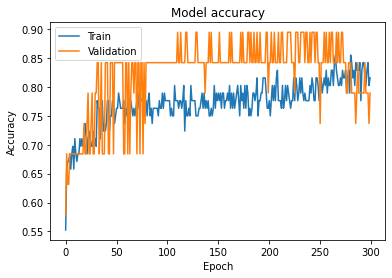

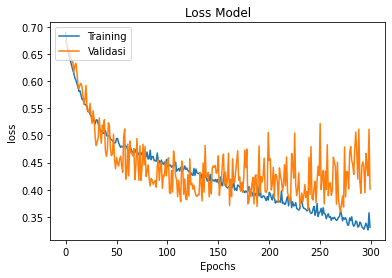

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
print('\n')
# Menampilkan nilai loss training dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validasi'], loc='upper left')
plt.show()

In [94]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Eror dari pengujian adalah {test_loss:.4f} dan akurasinya adalah {100*test_acc:.2f}')

1/1 [==============================] - 0s 21ms/step - loss: 0.3656 - accuracy: 0.8333
Eror dari pengujian adalah 0.3656 dan akurasinya adalah 83.33


## Prediksi

In [95]:
pred_rmsprop=model.predict(X_test)
rounded_rmsprop = [round(x[0]) for x in pred_rmsprop]
data_predict_rmsprop= pd.DataFrame(rounded_rmsprop, columns=['predict'])
Y_test =  Y_test.reset_index()
Y_test_rmsprop = Y_test[['TPT']]
result_rmsprop=pd.concat([Y_test_rmsprop,data_predict_rmsprop],axis=1)
result_rmsprop

,TPT,predict
0,0.0,0
1,1.0,1
2,1.0,1
3,0.0,0
4,0.0,0
5,1.0,1
6,1.0,0
7,1.0,1
8,1.0,1
9,1.0,1


In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_test = result_rmsprop['TPT']
Y_preds = result_rmsprop['predict']

print('accuracy score: ',accuracy_score(Y_test, Y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(Y_test,Y_preds))
print('\n')
print(classification_report(Y_test, Y_preds))

accuracy score:  0.8333333333333334


confusion matrix: 
 [[ 9  0]
 [ 4 11]]


              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82         9
         1.0       1.00      0.73      0.85        15

    accuracy                           0.83        24
   macro avg       0.85      0.87      0.83        24
weighted avg       0.88      0.83      0.84        24



# SMOTE

In [84]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(X_train,Y_train)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=X_train.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [85]:
#Proportion before smote
Y_train.value_counts()

1.0    55
0.0    40
Name: TPT, dtype: int64

In [86]:
#Proportion after smote
train_smote_Y.value_counts()

TPT
1.0    55
0.0    55
dtype: int64

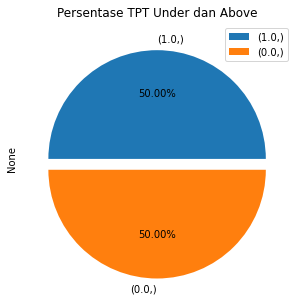

In [87]:
plt.figure(figsize=(5,5))
train_smote_Y.value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%')
plt.title("Persentase TPT Under dan Above")
plt.legend()
plt.show()

# SMOTE dgn optimizer = adam

In [98]:
from keras.models import Sequential
from keras.layers import Dense

jum_hidden_layer1 = 300
jum_hidden_layer2 = 20
jum_input_unit = X_train.shape[1]
jum_ouput_layer = 1
model = Sequential()
model.add(Dense(jum_hidden_layer1, input_dim=jum_input_unit, activation='relu'))
model.add(Dense(jum_hidden_layer2, activation='relu'))
model.add(Dense(jum_ouput_layer,activation = 'sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 300)               1500      
                                                                 
 dense_28 (Dense)            (None, 20)                6020      
                                                                 
 dense_29 (Dense)            (None, 1)                 21        
                                                                 
Total params: 7,541
Trainable params: 7,541
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [101]:
history = model.fit(train_smote_X, 
                    train_smote_Y, 
                    epochs=100,
                    validation_split=0.2, 
                    shuffle=True,
                    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=2,
                    callbacks=[stopTraining])

Epoch 1/100
3/3 - 1s - loss: 0.6832 - accuracy: 0.6023 - val_loss: 0.7243 - val_accuracy: 0.1364 - 640ms/epoch - 213ms/step
Epoch 2/100
3/3 - 0s - loss: 0.6719 - accuracy: 0.5909 - val_loss: 0.7380 - val_accuracy: 0.1364 - 46ms/epoch - 15ms/step
Epoch 3/100
3/3 - 0s - loss: 0.6652 - accuracy: 0.5909 - val_loss: 0.7537 - val_accuracy: 0.1364 - 37ms/epoch - 12ms/step
Epoch 4/100
3/3 - 0s - loss: 0.6563 - accuracy: 0.5909 - val_loss: 0.7640 - val_accuracy: 0.1364 - 46ms/epoch - 15ms/step
Epoch 5/100
3/3 - 0s - loss: 0.6495 - accuracy: 0.5909 - val_loss: 0.7739 - val_accuracy: 0.1364 - 30ms/epoch - 10ms/step
Epoch 6/100
3/3 - 0s - loss: 0.6430 - accuracy: 0.5909 - val_loss: 0.7842 - val_accuracy: 0.1364 - 34ms/epoch - 11ms/step
Epoch 7/100
3/3 - 0s - loss: 0.6367 - accuracy: 0.5909 - val_loss: 0.7935 - val_accuracy: 0.1364 - 29ms/epoch - 10ms/step
Epoch 8/100
3/3 - 0s - loss: 0.6304 - accuracy: 0.5909 - val_loss: 0.8019 - val_accuracy: 0.1364 - 53ms/epoch - 18ms/step
Epoch 9/100
3/3 - 0s -

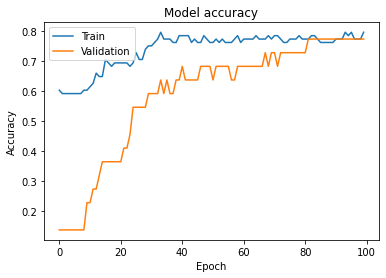

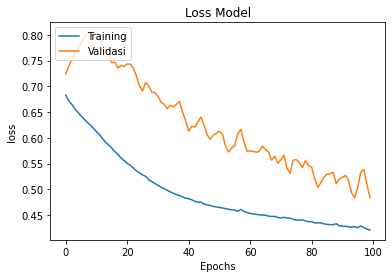

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
print('\n')
# Menampilkan nilai loss training dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validasi'], loc='upper left')
plt.show()

## Prediksi

In [103]:
pred_smote_adam=model.predict(X_test)
rounded_smote_adam = [round(x[0]) for x in pred_smote_adam]
data_predict_smote_adam= pd.DataFrame(rounded_smote_adam, columns=['predict'])
Y_test =  Y_test.reset_index()
Y_test_smote_adam = Y_test[['TPT']]
result_smote_adam=pd.concat([Y_test_smote_adam,data_predict_smote_adam],axis=1)
result_smote_adam

,TPT,predict
0,0.0,0
1,1.0,1
2,1.0,1
3,0.0,0
4,0.0,0
5,1.0,1
6,1.0,0
7,1.0,1
8,1.0,1
9,1.0,1


In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_test = result_smote_adam['TPT']
Y_preds = result_smote_adam['predict']

print('accuracy score: ',accuracy_score(Y_test, Y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(Y_test,Y_preds))
print('\n')
print(classification_report(Y_test, Y_preds))

accuracy score:  0.875


confusion matrix: 
 [[ 9  0]
 [ 3 12]]


              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         9
         1.0       1.00      0.80      0.89        15

    accuracy                           0.88        24
   macro avg       0.88      0.90      0.87        24
weighted avg       0.91      0.88      0.88        24

